In [ ]:
# load in libraries we will use later
try:
  from networkx import Graph
except:
  !pip install networkx
  !pip install matplotlib
  from networkx import Graph
  from networkx import draw_networkx as draw

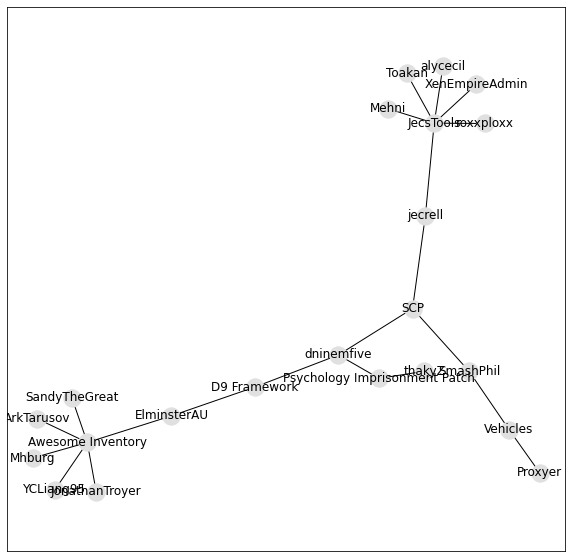

2


In [ ]:
# test graph drawing
from networkx import draw_networkx as draw
import matplotlib.pyplot as plt
G = Graph()
G.add_node('dninemfive')
G.add_node('D9 Framework')
G.add_edge('dninemfive', 'D9 Framework')
G.add_edge('ElminsterAU', 'D9 Framework')
G.add_node('Awesome Inventory')
G.add_edge('ElminsterAU', 'Awesome Inventory')
G.add_edge('Mhburg', 'Awesome Inventory')
G.add_edge('SandyTheGreat', 'Awesome Inventory')
G.add_edge('YCLiang95', 'Awesome Inventory')
G.add_edge('JonathanTroyer', 'Awesome Inventory')
G.add_edge('ArkTarusov', 'Awesome Inventory')
G.add_node('Psychology Imprisonment Patch')
G.add_edge('dninemfive', 'Psychology Imprisonment Patch')
G.add_node('thakyZ')
G.add_edge('thakyZ', 'Psychology Imprisonment Patch')
G.add_node('SCP')
G.add_edge('dninemfive', 'SCP')
G.add_edge('SmashPhil', 'SCP')
G.add_edge('jecrell', 'SCP')
G.add_edge('jecrell', 'JecsTools')
G.add_edge('JecsTools', 'alycecil')
G.add_edge('JecsTools', 'roxxploxx')
G.add_edge('JecsTools', 'Toakan')
G.add_edge('JecsTools', 'XenEmpireAdmin')
G.add_edge('JecsTools', 'Mehni')
G.add_edge('Vehicles', 'SmashPhil')
G.add_edge('Vehicles', 'Proxyer')
plt.figure(figsize=(10,10))
draw(G, node_color='#e0e0e0')
plt.axis("equal")
plt.show()
print(nx.shortest_path_length(G, 'dninemfive', 'ElminsterAU'))

In [ ]:
# test github API
import requests
import json
import getpass
username = input("Input username: ")
token = getpass.getpass("Input OAuth token: ")
response = requests.get('https://api.github.com/users/dninemfive/repos', {'type': 'all'}, auth=(username, token))
if response.status_code == 200:
  jsn = json.loads(response.text)
  for repo in jsn:
    # print(repo['name'])
    if repo['name'] == 'simplebulkproduction':
      print(json.loads(requests.get(repo['contributors_url'], {'affiliation': 'all'}, auth=(username, token)).text))
else: print("Response: " + response.status_code)

Input username: dninemfive
Input OAuth token: ··········
[{'login': 'dninemfive', 'id': 11084010, 'node_id': 'MDQ6VXNlcjExMDg0MDEw', 'avatar_url': 'https://avatars0.githubusercontent.com/u/11084010?v=4', 'gravatar_id': '', 'url': 'https://api.github.com/users/dninemfive', 'html_url': 'https://github.com/dninemfive', 'followers_url': 'https://api.github.com/users/dninemfive/followers', 'following_url': 'https://api.github.com/users/dninemfive/following{/other_user}', 'gists_url': 'https://api.github.com/users/dninemfive/gists{/gist_id}', 'starred_url': 'https://api.github.com/users/dninemfive/starred{/owner}{/repo}', 'subscriptions_url': 'https://api.github.com/users/dninemfive/subscriptions', 'organizations_url': 'https://api.github.com/users/dninemfive/orgs', 'repos_url': 'https://api.github.com/users/dninemfive/repos', 'events_url': 'https://api.github.com/users/dninemfive/events{/privacy}', 'received_events_url': 'https://api.github.com/users/dninemfive/received_events', 'type': 'Us

In [ ]:
# actually construct network graph
from networkx import draw_networkx as draw
from networkx import Graph
import networkx as nx
import matplotlib.pyplot as plt
import requests
import json
import getpass
import numbers
import math

def get_repos(url, min_contributors=2):
  """Takes a Github repo url and returns a list of Repo objects, discarding any with fewer contributors than min_contributors."""
  print('getting repos from ' + url + '...')
  response = requests.get(url, {'type': 'all'}, auth=(username, token))
  if response.status_code == 200:
    print('\tresponse received, code ' + str(response.status_code))
  else:
    print('\tresponse received, code ' + str(response.status_code) + ':\n' + json.loads(response.text))
    return []
  jason = json.loads(response.text)
  repos = []
  print('\tprocessing...')
  for j in jason:
    try:
      a = j['name']
    except:
      continue
    temp = Repo(j)
    print('\t\t' + repr(temp))
    # if not (remove_non_contiguous and User() in temp.contributors) and temp.num_contributors >= min_contributors: repos.append(temp)
    if temp.num_contributors >= min_contributors: repos.append(temp)
  print('done!')
  return repos

class Repo:
  def __init__(self, jsn):
    self.name = jsn['name']
    self.contributors = []
    try:
      for userJsn in json.loads(requests.get(jsn['contributors_url'], {'affiliation': 'all'}, auth=(username, token)).text):
        self.contributors.append(User(userJsn))
    except:
      pass

  def __repr__(self):
    return 'Repo ' + self.name + ', contributors: ' + repr(self.contributors)

  @property
  def name_for_graph(self):
    return 'r ' + self.name

  @property
  def num_contributors(self):
    return len(self.contributors)

class User:
  def __init__(self, jsn=None):
    if(jsn == None):
      self.name = target_user
      self.repos_url = 'https://api.github.com/users/' + target_user + '/repos'
    else:
      self.name = jsn['login']
      self.repos_url = jsn['repos_url']
  
  def __repr__(self):
    return "User " + self.name

  def __eq__(self, other):
    return self.name == other.name

  @property
  def name_for_graph(self):
    return 'u ' + self.name

def already_profiled(user, profiled_users):
  for cur in profiled_users:
    if user.name == cur: return True
  return False

def get_dist(graph, source, target):
  try:
    return nx.shortest_path_length(graph, source, target)
  except:
    return -1

def ask_for_max_depth():
  try:
    return int(input("Input maximum depth: "))
  except:
    print('Max depth must be a number!')
    return ask_for_max_depth()

def do_program():
  g = Graph()
  reposet, userset, profiled_users = set(), set(), set()
  users_to_profile_next = set([target_user])
  for depth in range(max_depth):
    users_to_profile = users_to_profile_next
    users_to_profile_next = set()
    print('depth ' + str(depth) + ' (users: ' + str(len(users_to_profile)) + ')')    
    ct = 1
    for cur_target in users_to_profile:
      print('user ' + str(ct) + '/' + str(len(users_to_profile)))
      if len(cur_target) < 1: continue
      profiled_users.add(cur_target)
      for repo in get_repos('https://api.github.com/users/' + cur_target + '/repos'):
        reposet.add(repo.name_for_graph)
        for user in repo.contributors:
          userset.add(user.name_for_graph)
          if not already_profiled(user, profiled_users): users_to_profile_next.add(user.name)
          g.add_edge(user.name_for_graph, repo.name_for_graph)
      ct += 1
  print('data collected.\nprocessing...')
  labels = {}
  print('\tremoving discontiguous regions...')
  target_user_key = 'u ' + target_user
  remove_from_reposet = set()
  for r in reposet:
    if remove_non_contiguous and get_dist(g, target_user_key, r) == -1:
      try:
        g.remove_node(r)
        remove_from_reposet.add(r)      
      except:
        print('\t\ttried to remove node ' + r + ", but it didn't exist!")
      continue
    labels[r] = r.replace('r ','',1)
  for r in remove_from_reposet: reposet.remove(r)
  remove_from_userset = set()
  for u in userset:
    dist = get_dist(g, 'u ' + target_user, u)
    if remove_non_contiguous and dist == -1:
      try:
        g.remove_node(u)
        remove_from_userset.add(u)      
      except:
        print('\t\ttried to remove node ' + u + ", but it didn't exist!")
      continue
    labels[u] = u.replace('u ','',1) + ' (' + str(dist//2) + ')'
  for u in remove_from_userset: userset.remove(u)
  w = 4 * math.sqrt(len(g))
  if w <= 0: w = 1
  h = w
  plt.figure(figsize=(w,h))
  print('\tdoing layout...')
  pos = nx.spring_layout(g)
  print('\t\tdone.')
  nx.draw_networkx_nodes(g, pos, nodelist=reposet, node_color='#80ff80')
  nx.draw_networkx_nodes(g, pos, nodelist=userset, node_color='#8080ff')
  nx.draw_networkx_edges(g, pos, edge_color='#a0a0a0')
  nx.draw_networkx_labels(g, pos, labels)
  plt.axis("equal")
  plt.show()

username = input("Input your username: ")
token = getpass.getpass("Input OAuth token: ")
# validate username/OAuth combination
response_code = requests.get('https://api.github.com/users/' + username + '/repos', {'type': 'all'}, auth=(username, token)).status_code
while(not response_code == 200):
  print('Username and/or OAuth token invalid, code ' + str(response_code))
  username = input("Input your username: ")
  token = getpass.getpass("Input OAuth token: ")
  response_code = requests.get('https://api.github.com/users/' + username + '/repos', {'type': 'all'}, auth=(username, token)).status_code
target_user = input("Input target user: ")
response_code = requests.get('https://api.github.com/users/' + target_user + '/repos', {'type': 'all'}, auth=(username, token)).status_code
while(not response_code == 200):
  print('Invalid target user, code ' + str(response_code))
  target_user = input("Input target user: ")
  response_code = requests.get('https://api.github.com/users/' + target_user + '/repos', {'type': 'all'}, auth=(username, token)).status_code
max_depth = ask_for_max_depth()
print("You generally want to remove non-contiguous networks, they tend to add more clutter rather than being helpful.")
remove_in = input('Remove non-contiguous networks? y/n: ')
remove_non_contiguous = len(remove_in) < 1 or not remove_in.lower()[0] == 'n'
do_program()